In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm, tree
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, LeaveOneOut, GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import random
from datetime import datetime

In [2]:
solvent_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'solvent')
solvent_data.set_index('solvent_name', inplace = True)
solvent_columns = list(solvent_data.columns)

In [3]:
nucleophile_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'nucleophiles')
nucleophile_data.set_index('nucleophile_name', inplace = True)
nucleophile_columns = list(nucleophile_data.columns)

In [4]:
raw_catalyst_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'full_catalyst')
raw_catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)

r_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    r_catalyst_data.iloc[i, 1] = r_catalyst_data.iloc[i, 1].replace('R/S', 'R')

s_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    s_catalyst_data.iloc[i, 1] = s_catalyst_data.iloc[i, 1].replace('R/S', 'S')

catalyst_data = pd.concat([r_catalyst_data, s_catalyst_data])
catalyst_data.set_index('catalyst_name', inplace = True)
catalyst_columns = list(catalyst_data.columns)

In [5]:
raw_catalyst_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'full_catalyst')
raw_catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)

#Taking care of catalyst R/S
r_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    r_catalyst_data.iloc[i, 1] = r_catalyst_data.iloc[i, 1].replace('R/S', 'R')
    #print(r_catalyst_data.iloc[i, 1])
#r_catalyst_data.drop(17, inplace = True)    

s_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    s_catalyst_data.iloc[i, 1] = s_catalyst_data.iloc[i, 1].replace('R/S', 'S')
    #print(s_catalyst_data.iloc[i, 1])
    
catalyst_data = pd.concat([r_catalyst_data, s_catalyst_data])
catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)
catalyst_data.set_index('catalyst_name', inplace = True)

catalyst_columns = list(catalyst_data.columns)

catalyst_data

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
catalyst_name,,,,,,,,,,,,,,,,,,,,,
"(R)-2,2'-Dihydroxy-3,3'-diphenyl-1,1'-binaphthalene cyclic phosphate",Ph,54.388,54.395,54.3915,56.388,70,0.773891,6.89,1.70,3.33,...,-0.23000,-0.22400,-0.21100,-0.186000,1085.06,364.3460,1306.55,271.6062,2.54600,266.5125
"(R)-3,3′-Bis(4-nitrophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-NO2C6H4,52.789,52.801,52.7950,56.202,64,0.920026,8.28,1.70,3.34,...,-0.17700,0.01000,-0.19500,-0.207000,1086.44,320.2800,1310.44,295.3595,2.54500,266.1502
"(R)-3,3'-Bis[4-(2,4,6-trimethylphenyl)phenyl]-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","4-(2,4,6-MeC6H2)C6H4",53.962,53.963,53.9625,56.355,38,0.296369,12.27,2.97,4.61,...,-0.20700,-0.05300,-0.22300,-0.199000,1085.55,356.6200,1306.58,242.2277,2.54600,266.3224
"(R)-3,3′-Bis(4-chlorophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-ClC6H4,53.704,53.718,53.7110,56.219,67,-0.855520,8.21,1.70,3.33,...,-0.23200,-0.03000,-0.25000,-0.190000,1085.19,338.5586,1306.11,286.4410,2.54600,266.1394
"(R)-3,3'-Bis(4-diphenyl)-1,1'-binaphthyl 2,2'-diyl hydrogenphosphate",4-PhC6H4,42.215,52.094,47.1545,55.769,50,-0.262375,11.22,2.01,3.50,...,-0.19550,-0.06650,-0.20200,-0.183500,1087.44,332.8368,1317.37,222.6765,2.53900,268.1404
"(R)-3,3′-Bis(4-trifluoromethylphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-CF3C6H4,53.619,53.627,53.6230,56.229,56,-0.521551,8.28,1.83,3.34,...,-0.19300,-0.17200,-0.17700,-0.184000,1086.23,355.7629,1307.21,397.3333,2.54500,266.1523
"(R)-3,3′-Bis(3,5-dinitrolphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-NO2C6H3",59.563,59.562,59.5625,55.628,66,-0.026551,7.58,1.70,5.12,...,0.02900,-0.17300,0.01300,-0.154000,1087.41,296.0611,1317.62,300.6142,2.54300,266.2896
"(R)-3,3'-Bis(3,5-diphenyl)phenyl-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","3,5-PhC6H3",42.585,60.259,51.4220,54.746,36,-0.991779,8.59,2.59,7.06,...,-0.04700,-0.18750,-0.05650,-0.171500,1085.98,366.5389,1310.24,248.6693,2.54800,269.8459
"(R)-3,3′-Bis[3,5-bis(trifluoromethyl)phenyl]-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-(CF3)2-C6H3",55.665,55.883,55.7740,56.229,62,-0.739181,7.44,2.39,5.06,...,-0.14850,-0.16150,-0.16650,-0.157000,1086.10,320.0554,1312.33,202.3039,2.54400,266.3457


In [6]:
iminium_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'iminiums')
iminium_data.rename(columns = {'imine': 'iminium_name', 'electronic energy difference (kcal/mol) ': 'electronic energy difference (kcal/mol)'}, inplace = True)
#removed space at the end of electronic energy
iminium_data.set_index('iminium_name', inplace = True)
iminium_data.drop(labels = ['Unnamed: 1'], axis = 1, inplace = True)
for i in range(1, 181):
    z_iminium_name = '(Z)-Iminium ' + str(i)
    e_iminium_name = '(E)-Iminium ' + str(i)
    iminium_data.loc[z_iminium_name, 'electronic energy difference (kcal/mol)'] = iminium_data.loc[e_iminium_name, 'electronic energy difference (kcal/mol)']
iminium_columns = list(iminium_data.columns)

In [7]:
iminium_data.head()

,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,PGB1,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
iminium_name,,,,,,,,,,,,,,,,,,,,,
(E)-Iminium 1,3474.83,97.5295,-0.426,0.442,0.487,-0.464,-0.697,0.030,8.85,1.76,...,3.59,1.7,2.12,4.61,1.7,7.04,-0.40205,-0.17518,201.89,1.62
(Z)-Iminium 1,3491.05,82.0336,-0.430,0.424,0.526,-0.488,-0.687,0.017,8.84,1.77,...,3.59,1.7,2.13,4.77,1.7,7.17,-0.40330,-0.17332,193.50,1.62
(E)-Iminium 2,3400.90,359.5285,-0.447,0.457,0.477,-0.466,-0.690,0.031,8.81,1.75,...,3.59,1.7,2.12,4.76,1.7,5.63,-0.40541,-0.17578,164.07,1.86
(Z)-Iminium 2,3494.88,82.0612,-0.438,0.425,0.523,-0.503,-0.689,0.022,8.85,1.76,...,3.59,1.7,2.13,4.66,1.7,5.07,-0.40963,-0.17836,160.51,1.86
(E)-Iminium 3,3196.55,910.2524,-0.419,0.469,0.420,-0.140,-0.690,0.032,8.79,1.74,...,3.59,1.7,2.12,7.09,1.7,7.45,-0.40169,-0.18157,220.26,0.69


In [8]:
class Reaction():
    
    def __init__(self, name, entry, catalyst, nucleophile, substrate, solvent, iminium_type, iminium, majorenantiomer, minorenantiomer, ee, G):
        self.name = name
        self.entry = entry
        self.catalyst = catalyst
        self.nucleophile = nucleophile
        self.substrate = substrate
        self.solvent = solvent
        self.iminium_type = iminium_type
        self.iminium = iminium
        self.majorenantiomer = majorenantiomer
        self.minorenantiomer = minorenantiomer
        self.ee = ee
        self.G = G
            
        self.solvent_properties = dict()
        for column in solvent_columns:
            self.solvent_properties[column] = solvent_data.loc[solvent, column]
            
        self.catalyst_properties = dict()
        for column in catalyst_columns:
            self.catalyst_properties[column] = catalyst_data.loc[catalyst, column]
            
        self.nucleophile_properties = dict()
        for column in nucleophile_columns:
            self.nucleophile_properties[column] = nucleophile_data.loc[nucleophile, column]
        
        self.e_iminium = '(E)-' + str(iminium)
        self.z_iminium = '(Z)-' + str(iminium)
        
        self.e_iminium_properties = dict()
        self.z_iminium_properties = dict()
        for column in iminium_columns:
            self.e_iminium_properties[column] = iminium_data.loc[self.e_iminium, column]
            self.z_iminium_properties[column] = iminium_data.loc[self.z_iminium, column]
            
        
            
    def __repr__(self):
        return "Reaction - {}".format(self.name)
        #iminium stuff

In [9]:
reactions = dict()

def process_data(reaction_number, reaction, iminium_type, sheetname = None):
    reaction_file = '/Users/jlisd/Downloads/AI Chem/AI Chem/reaction info 5-23/' + str(reaction_number) + ' ' + reaction + '.xlsx'
    if sheetname == None:
        data = pd.read_excel(reaction_file)
    else:
        data = pd.read_excel(reaction_file, sheet_name = sheetname)
        
    data.set_index('entry', inplace = True)
    
    entries = len(data)
    for entry in range(1, entries + 1):
        if sheetname == None:
            reaction_name = reaction + ' ' + str(entry)
        else:
            reaction_name = reaction + ' ' + sheetname + ' ' + str(entry)
        
        
        reactions[reaction_name] = Reaction(reaction_name, 
                                            entry,
                                            data.loc[entry, 'Catalyst'],
                                            data.loc[entry, 'Nucleophile'],
                                            data.loc[entry, 'Substrate'],
                                            data.loc[entry, 'Solvent'],
                                            iminium_type,
                                            data.loc[entry, 'Iminium'],
                                            data.loc[entry, 'Major Enantiomer'],
                                            data.loc[entry, 'Minor Enantiomer'],
                                            data.loc[entry, 'ee'],
                                            data.loc[entry, 'ΔΔG‡'])
        


In [10]:
process_data(1, 'Addition of Alcohols', 'E', 'Scope')
process_data(2, 'Addition of thiols', 'E', 'Catalyst & solvent screening da')
process_data(2, 'Addition of thiols', 'E', 'Effect of catalyst loading')
process_data(2, 'Addition of thiols', 'E', 'Imine scope')
process_data(2, 'Addition of thiols', 'E', 'Thiol scope')
process_data(3, 'Hydrophosphonylation of imines', 'E', 'Catalyst screening data')
process_data(3, 'Hydrophosphonylation of imines', 'E', 'Scope')
process_data(4, 'Addition of diazomethylphosphonates', 'E', "Optimization of catalyst and re")
process_data(4, 'Addition of diazomethylphosphonates', 'E', "Imine scope")
process_data(5, 'Addition of diazoacetamides', 'E', 'Catalyst screening data')
process_data(5, 'Addition of diazoacetamides', 'E', 'Solvent screening data')
process_data(5, 'Addition of diazoacetamides', 'E', 'Substrate(s) scope')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Catalyst screening data')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Solvent screening data')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Imine scope')
process_data(7, 'Peroxidation of imines', 'E', 'Catalyst screening data')
process_data(7, 'Peroxidation of imines', 'E', 'Solvent screening data')
process_data(7, 'Peroxidation of imines', 'E', 'Substrate(s) scope')
process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Catalyst screening and reaction')
process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Scope')
process_data(9, 'Transfer Hydrogenation of Enamides', 'E', 'Scope')
process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Catalyst screening data')
process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Imine scope')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Catalyst screening data')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Solvent screening data')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Imine scope')
process_data(12, 'Reductive amination of N-aryl imines (Macmillan)', 'Z', 'Reaction optimization')
process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Benzothiazoline screening data')
process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Imine scope')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Catalyst screening data')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Benzothiazoline screening data')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Imine scope')
process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Catalyst screening data')
process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Imine scope')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Benzothiazoline screening data')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 1 benzothiazoline')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 2 dihydropyridine')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Catalyst screening data')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Solvent data')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Imine scope')
#process_data(18, 'Addition of enecarbamates to benzoyl imines')
#process_data(19, 'Hydrogenation of fluorinated alkynyl ketimines')
#process_data(20, 'Addition of thiols to imines (Denmark)')

In [11]:
print(len(reactions))

381


In [12]:
catalyst = pd.DataFrame(columns = ['Reaction'] + catalyst_columns)
catalyst.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in catalyst_columns:
        catalyst.loc[reaction, column] = reactions[reaction].catalyst_properties[column]
        
#first column is numerical

In [13]:
catalyst.head()

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 2,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 3,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 4,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 5,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953


In [14]:
nucleophile = pd.DataFrame(columns = ['Reaction'] + nucleophile_columns)
nucleophile.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in nucleophile_columns:
        nucleophile.loc[reaction, column] = reactions[reaction].nucleophile_properties[column]
        
#first column is numerical

In [15]:
nucleophile.head()

,nucleophile,H (nucleophile),X,Nu,nXH,iXH,HOMO (nucleophile),LUMO (nucleophile),Polarizability (nucleophile),L,B1,B5,bond distance H-X,H-X-Nu,H-X-CNu
Reaction,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,methanol,0.458,-0.707,-0.707,3899.4,40.1897,-0.35328,0.0626,18.27,3.99,1.4,3.17,0.96,180,180
Addition of Alcohols Scope 2,ethanol,0.464,-0.717,-0.717,3893.54,39.6036,-0.34808,0.06264,30.23,5.03,1.2,3.41,0.96,180,180
Addition of Alcohols Scope 3,isopropanol,0.461,-0.717,-0.717,3877.1,28.7764,-0.34588,0.05777,42.01,5.03,1.13,4.45,0.96,180,180
Addition of Alcohols Scope 4,tert-butanol,0.459,-0.722,-0.722,3859.15,22.2253,-0.34415,0.05141,53.61,5.03,1.44,4.44,0.96,180,180
Addition of Alcohols Scope 5,2-chloroethanol,0.471,-0.704,-0.704,3851.9,43.4805,-0.3582,0.05955,40.75,3.98,1.4,4.44,0.96,180,180


In [16]:
solvent = pd.DataFrame(columns = ['Reaction'] + solvent_columns)
solvent.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in solvent_columns:
        solvent.loc[reaction, column] = reactions[reaction].solvent_properties[column]
        
#first column is numerical

In [17]:
solvent.head()

,solvent,First Zagreb,First Zagreb index by valence vertex degrees,Second Zagreb,Second Zagreb index by valence vertex degrees,Polarity,Narumi Simple Topological,Narumi Harmonic Topological,Narumi Geometric Topological,Total structure connectivity,...,CLOGP,MR,CMR,RMM,Density,no. of H bond donor,no. H bond acceptor,Polarizability (solvent),HOMO (solvent),LUMO (solvent)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 2,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 3,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 4,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 5,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588


In [18]:
iminium = pd.DataFrame(columns = ['Reaction', "iminium_type"] + iminium_columns)
iminium.set_index('Reaction', inplace = True)

for reaction in reactions:
    if reactions[reaction].iminium_type == 'E':
        iminium.loc[reaction, "iminium_type"] = 'E'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].e_iminium_properties[column]
    elif reactions[reaction].iminium_type == 'Z':
        iminium.loc[reaction, "iminium_type"] = 'Z'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].z_iminium_properties[column]

            

In [19]:
iminium.head()

,iminium_type,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 2,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 3,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 4,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 5,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67


In [20]:
ee = pd.DataFrame(columns = ['Reaction', 'ee'])
ee.set_index('Reaction', inplace = True)

for reaction in reactions:
    ee.loc[reaction, 'ee'] = reactions[reaction].ee

In [21]:
Y = pd.DataFrame(columns = ['Reaction', 'ΔΔG‡'])
Y.set_index('Reaction', inplace = True)

for reaction in reactions:
    Y.loc[reaction, 'ΔΔG‡'] = reactions[reaction].G
    

In [22]:
print(catalyst.shape, nucleophile.shape, solvent.shape, iminium.shape, ee.shape)

(381, 85) (381, 15) (381, 160) (381, 22) (381, 1)


In [23]:
X_iminium = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
               nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1), 
               iminium.drop(['iminium_type'], axis = 1)], axis = 1)
X_iminium.shape

(381, 278)

In [24]:
X_iminium

,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,L2 R,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 2,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 3,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 4,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 5,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strecker Reaction (with ketimines) Imine scope 6,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,3.59,1.7,2.12,11.09,1.96,3.29,-0.38303,-0.18662,288.98,1.14
Strecker Reaction (with ketimines) Imine scope 7,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,3.59,1.7,2.12,11.09,1.97,3.29,-0.39109,-0.19325,293.53,1.22
Strecker Reaction (with ketimines) Imine scope 8,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,3.59,1.7,2.12,8.36,1.73,3.3,-0.38516,-0.19602,223.73,2.41


In [25]:
#no iminium features
X_no_iminium = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
               nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1)], axis = 1)
X_no_iminium.shape

(381, 257)

In [26]:
X_no_nucleophile = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
                   solvent.drop(['solvent'], axis = 1),
                   iminium.drop(['iminium_type'], axis = 1)], axis = 1)
X_no_nucleophile.shape

(381, 264)

In [28]:
X_special_91 = pd.concat([nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1)], axis = 1)

In [27]:
for reaction in reactions:
    if iminium.loc[reaction, 'iminium_type'] == 'Z':
        Y.loc[reaction, 'ΔΔG‡'] = Y.loc[reaction, 'ΔΔG‡'] * (-1)

In [28]:
Y

,ΔΔG‡
Reaction,
Addition of Alcohols Scope 1,2.05829
Addition of Alcohols Scope 2,1.74348
Addition of Alcohols Scope 3,1.62926
Addition of Alcohols Scope 4,1.88181
Addition of Alcohols Scope 5,1.88181
...,...
Strecker Reaction (with ketimines) Imine scope 6,-0.840427
Strecker Reaction (with ketimines) Imine scope 7,-1.01725
Strecker Reaction (with ketimines) Imine scope 8,-0.767712


Data Creation

In [29]:
catalyst_updated = pd.DataFrame(columns = ['Reaction'])
catalyst_updated.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in catalyst_columns:
        column_name = 'Catalyst - ' + column
        catalyst_updated.loc[reaction, column_name] = reactions[reaction].catalyst_properties[column]

In [30]:
nucleophile_updated = pd.DataFrame(columns = ['Reaction'])
nucleophile_updated.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in nucleophile_columns:
        column_name = 'Nucleophile - ' + column
        nucleophile_updated.loc[reaction, column_name] = reactions[reaction].nucleophile_properties[column]

In [31]:
solvent_updated = pd.DataFrame(columns = ['Reaction'])
solvent_updated.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in solvent_columns:
        column_name = 'Solvent - ' + column
        solvent_updated.loc[reaction, column_name] = reactions[reaction].solvent_properties[column]

In [ ]:
iminium_updated = pd.DataFrame(columns = ['Reaction', "iminium_type"])
iminium_updated.set_index('Reaction', inplace = True)

for reaction in reactions:
    if reactions[reaction].iminium_type == 'E':
        iminium_updated.loc[reaction, "iminium_type"] = 'E'
        for column in iminium_columns:
            column_name = 'Iminium - ' + column
            iminium_updated.loc[reaction, column_name] = reactions[reaction].e_iminium_properties[column]
    elif reactions[reaction].iminium_type == 'Z':
        iminium_updated.loc[reaction, "iminium_type"] = 'Z'
        for column in iminium_columns:
            column_name = 'Iminium - ' + column
            iminium_updated.loc[reaction, column_name] = reactions[reaction].z_iminium_properties[column]

In [ ]:
Y

In [ ]:
data = pd.concat([catalyst_updated.drop(['Catalyst - Ar group'], axis = 1), 
               nucleophile_updated.drop(['Nucleophile - nucleophile'], axis = 1), 
               solvent_updated.drop(['Solvent - solvent'], axis = 1), 
               iminium_updated.drop(['iminium_type'], axis = 1),
                Y], axis = 1)

In [ ]:
data

In [ ]:
#data.to_excel('data w substance type.xlsx')

###############################################################################################################################

Reactions 18 - 20

###############################################################################################################################

In [29]:
#out of sample
X_oos = pd.read_excel('X_oos.xlsx', index = 'Reaction')
X_oos_iminium = pd.read_excel('X_oos_iminium.xlsx', index = Reaction)
Y_oos = pd.read_excel('Y_oos.xlsx', index = 'Reaction')

X_oos.set_index('Reaction', inplace = True)
X_oos_iminium.set_index('Reaction', inplace = True)
Y_oos.set_index('Reaction', inplace = True)

In [30]:
#X_oos_iminium = pd.concat([X_oos, iminium_oos.drop(['iminium_type'], axis = 1)], axis = 1)

In [31]:
#X_oos_iminium.to_excel('X_oos_iminium.xlsx')

###############################################################################################################################

End of Data Processing

###############################################################################################################################

In [29]:
random_state = random.seed(datetime.now())
test_size = 0.5
X = X_special_91

In [62]:
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X.loc[:, ['Balaban-type index from polarizability weighted distance matrix','C', 'N', 'H-X-CNu', 'L2 A', 'SubS']], Y, test_size = test_size, random_state = random_state)

model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.49409164949906814
r^2: 0.8416409572426182
Total r^2 score: 0.8448792063290357


In [51]:
model.coef_

array([[-6.89186955,  0.17714352,  0.00691794,  1.54417709,  0.0238983 ]])

Text(0, 0.5, 'Predicted G values')

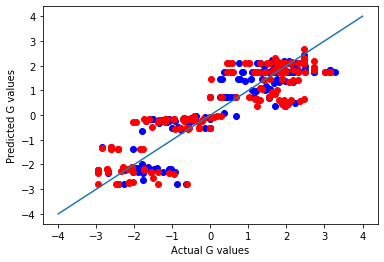

In [49]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b')
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r')
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')

In [39]:
OOS_pred = lasso_model.predict(X_oos_iminium.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

MSE: 1.8724909409904265
Mean Absolute Error 18: 1.5489185492520439
Mean Absolute Error 19: 1.3088329708297861
Mean Absolute Error 20: 1.0959141150200857
r^2: 0.6137545936055584


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,2.169290,0.558822
Addition of enecarbamates to benzoyl imines 2,1.963952,0.526584
Addition of enecarbamates to benzoyl imines 3,1.963952,0.473797
Addition of enecarbamates to benzoyl imines 4,1.963952,0.473797
Addition of enecarbamates to benzoyl imines 5,1.881808,0.591465
Addition of enecarbamates to benzoyl imines 6,2.304448,0.636210
Addition of enecarbamates to benzoyl imines 7,2.169290,0.662254
Addition of enecarbamates to benzoyl imines 8,2.169290,0.634201
Addition of enecarbamates to benzoyl imines 9,2.304448,0.634201


In [30]:
lasso_model = Lasso(alpha = 0.01)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

lasso_model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = lasso_model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = lasso_model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.7559134893991217
r^2: 0.7550357000507226
Total r^2 score: 0.783759270337485


C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.527540942233344, tolerance: 0.05653537964143918
  positive)


In [31]:
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lasso_model.coef_), pd.DataFrame(np.abs(lasso_model.coef_))], axis = 1)
features.columns = ['Feature', 'Coefficient', 'Abs Val Coefficient']
features.set_index('Feature', inplace = True)

features.sort_values(by = ['Abs Val Coefficient'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Coefficient', 'Abs Val Coefficient']]
        
features.head(25)
#for i in range(299):
 #   if np.abs(features.iloc[i,0]) > 0.001:
  #      print(i, features.index[i])



,type,Coefficient,Abs Val Coefficient
Feature,,,
B1,nucleophile,-0.350514,0.350514
Centralization,solvent,0.220640,0.220640
Variation,solvent,-0.177153,0.177153
L,nucleophile,-0.107277,0.107277
First Zagreb,solvent,-0.104648,0.104648
B5,nucleophile,-0.099156,0.099156
H-X-CNu,nucleophile,0.085166,0.085166
Quasi Wiener,solvent,-0.073008,0.073008
PEOE9,solvent,0.043301,0.043301


In [44]:
#features.to_excel('features.xlsx', sheet_name = "Lasso")

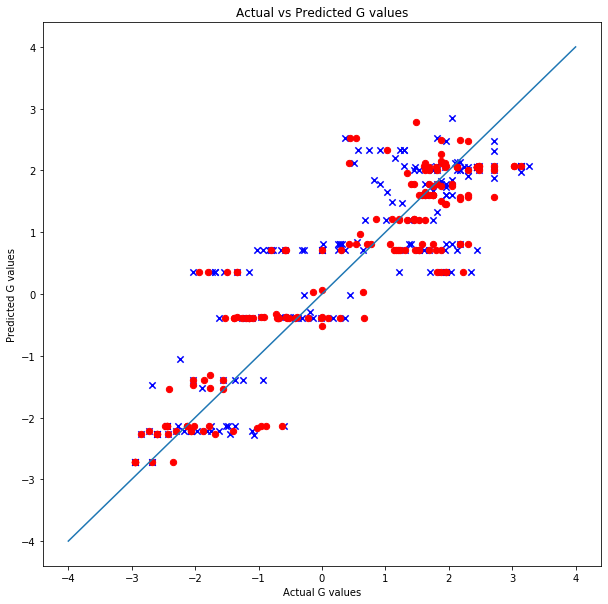

In [33]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [34]:
knn = KNeighborsRegressor(n_neighbors = 2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

knn.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = knn.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = knn.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 1.058884527883654
r^2: 0.6380346961630519
Total r^2 score: 0.7326301307214194


In [35]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [36]:
OOS_pred = knn.predict(X_oos_iminium.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

NameError: name 'X_oos_iminium' is not defined

In [37]:
tree_model = DecisionTreeRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

tree_model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = tree_model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('test r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = tree_model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.6529210285342306
test r^2: 0.7832329880798357
Total r^2 score: 0.8289889615776282


In [47]:
tree_model.feature_importances_
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(tree_model.feature_importances_)], axis = 1)
features.columns = ['Feature', 'Importance']
features.set_index('Feature', inplace = True)
features.sort_values(by = ['Importance'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Importance']]

#features.head(25)
#for i in range(299):
 #   if np.abs(features.iloc[i,0]) > 0.01:
  #      print(i, features.index[i])

In [48]:
#features.to_excel('features.xlsx', sheet_name = "Decision Tree")

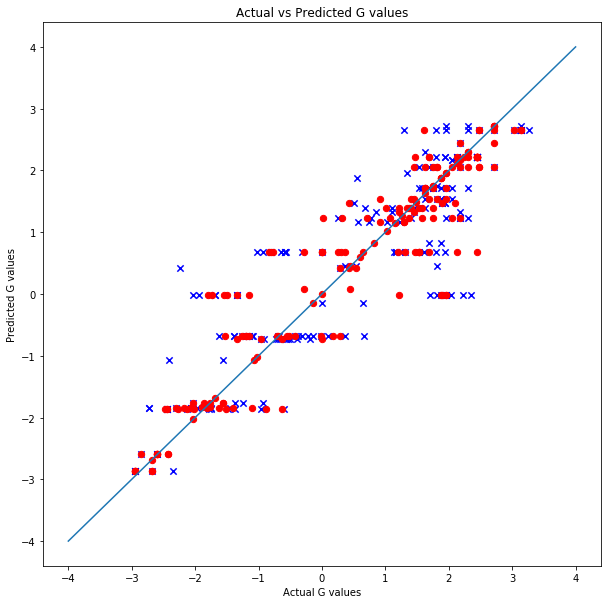

In [38]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [40]:
boosting_tree = GradientBoostingRegressor(max_depth = 3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

boosting_tree.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = boosting_tree.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('test r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = boosting_tree.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.5402253202153401
test r^2: 0.8245241884803675
Total r^2 score: 0.8376489320836829


In [124]:
boosting_tree.feature_importances_
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(boosting_tree.feature_importances_)], axis = 1)
features.columns = ['Feature', 'Importance']
features.set_index('Feature', inplace = True)
features.sort_values(by = ['Importance'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Importance']]
features.head(25)

#features.head(25)
#for i in range(299):
 #   if features.iloc[i,0] > 0.01:
  #      print(i, features.index[i])

,type,Importance
Feature,,
electronic energy difference (kcal/mol),iminium,0.449768
H-X-CNu,nucleophile,0.255565
SubL,iminium,0.058347
LB5,iminium,0.038206
nNH,iminium,0.030436
HOMO (nucleophile),nucleophile,0.030409
aavg,catalyst,0.022596
alhs,catalyst,0.021679
arhs,catalyst,0.016914


In [52]:
#features.to_excel('features.xlsx', sheet_name = "Boosting Tree")

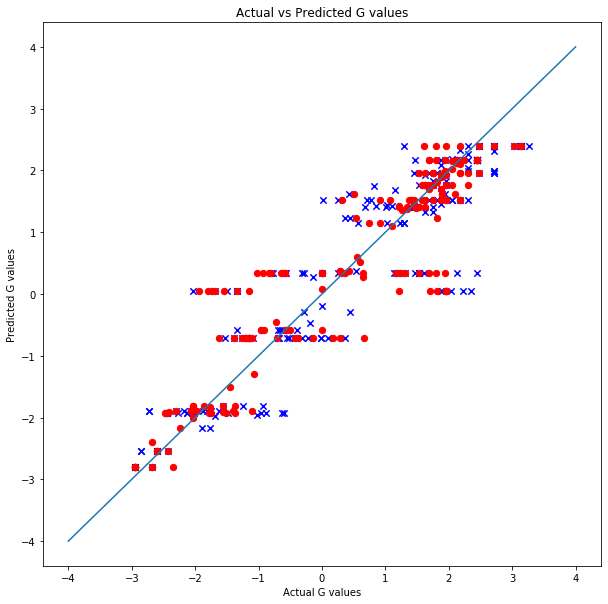

In [41]:
x = np.linspace(-4,4,10)

plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [114]:
OOS_pred = boosting_tree.predict(X_oos_iminium.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

MSE: 0.900784391232063
Mean Absolute Error 18: 1.2777397249861264
Mean Absolute Error 19: 0.6343621280437676
Mean Absolute Error 20: 0.6995276288759789
r^2: 0.8141919805063683


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,2.169290,0.997685
Addition of enecarbamates to benzoyl imines 2,1.963952,1.241777
Addition of enecarbamates to benzoyl imines 3,1.963952,1.286291
Addition of enecarbamates to benzoyl imines 4,1.963952,1.286291
Addition of enecarbamates to benzoyl imines 5,1.881808,0.776336
Addition of enecarbamates to benzoyl imines 6,2.304448,1.025843
Addition of enecarbamates to benzoyl imines 7,2.169290,0.721509
Addition of enecarbamates to benzoyl imines 8,2.169290,0.415810
Addition of enecarbamates to benzoyl imines 9,2.304448,0.415810


In [43]:
forest = RandomForestRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results
print('Train r^2 score:' + str(r2_score(train_results['Actual'], train_results['Predicted'])))

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.5104140686434911
r^2: 0.8425517366357477
Train r^2 score:0.8315683593915348
Total r^2 score: 0.8374574299974062


In [53]:
OOS_pred = forest.predict(X_oos.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

ValueError: Number of features of the model must match the input. Model n_features is 278 and input n_features is 257 

In [44]:
plt.scatter(X.loc[:, 'C'], Y, color = 'b', marker = 'x', s = 40)
plt.scatter(X_oos_iminium.loc[:, 'C'], Y_oos, color = 'r', marker = 'o', s = 40)

#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.xlabel('C')
plt.ylabel('DDG')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

KeyError: 'C'

In [47]:
forest.feature_importances_
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(forest.feature_importances_)], axis = 1)
features.columns = ['Feature', 'Importance']
features.set_index('Feature', inplace = True)
features.sort_values(by = ['Importance'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Importance']]

features.head(25)
#features.index[0:20]

,type,Importance
Feature,,
H-X-Nu,nucleophile,0.258234
H-X-CNu,nucleophile,0.226587
Nu,nucleophile,0.206594
Polarizability (nucleophile),nucleophile,0.109346
iXH,nucleophile,0.026721
HOMO (nucleophile),nucleophile,0.024391
B1,nucleophile,0.010626
B5,nucleophile,0.010272
L,nucleophile,0.006986


In [65]:
#features.to_excel('features.xlsx', sheet_name = "Random Forest")

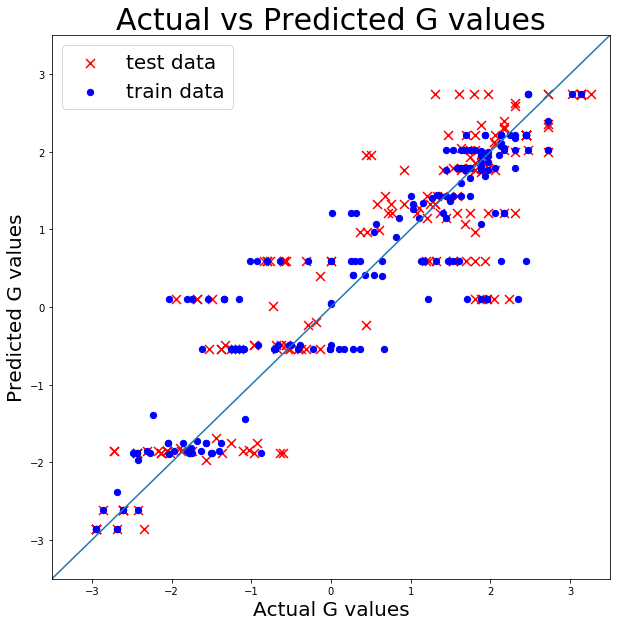

In [46]:
x = np.linspace(-4,4,10)


plt.scatter(results['Actual'], results['Predicted'], color = 'r', marker = 'x', s = 80, label = "test data")
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'b', marker = 'o', s = 40, label = "train data")
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.plot(x, x)
plt.title('Actual vs Predicted G values', fontsize = 30)
plt.xlabel('Actual G values', fontsize = 20)
plt.ylabel('Predicted G values', fontsize = 20)
plt.rcParams['figure.figsize'] = [10,10]
plt.legend(prop={'size': 20})
plt.show()

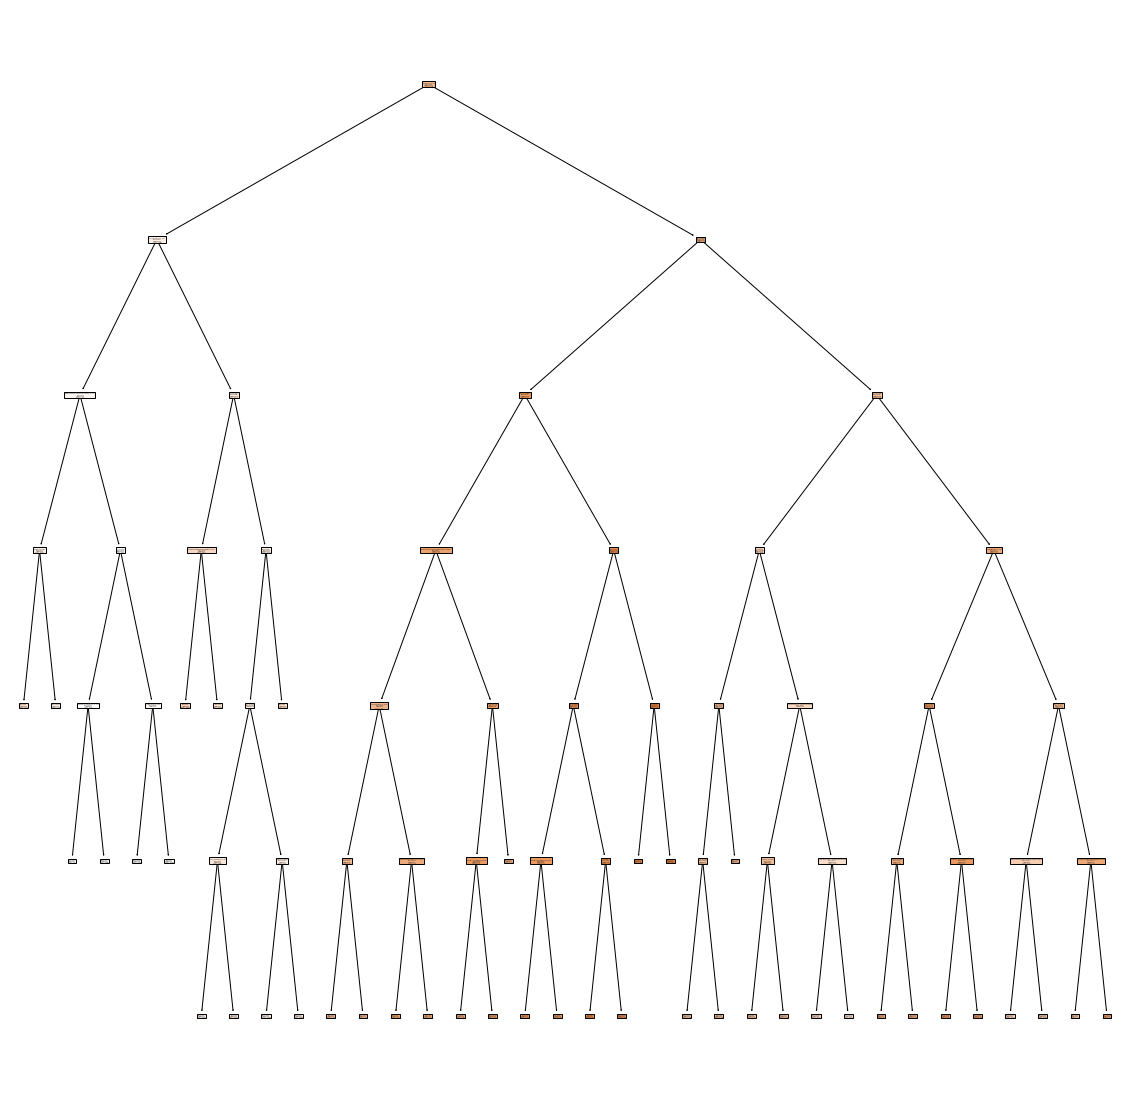

In [132]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(forest.estimators_[1], feature_names=X.columns, filled=True)

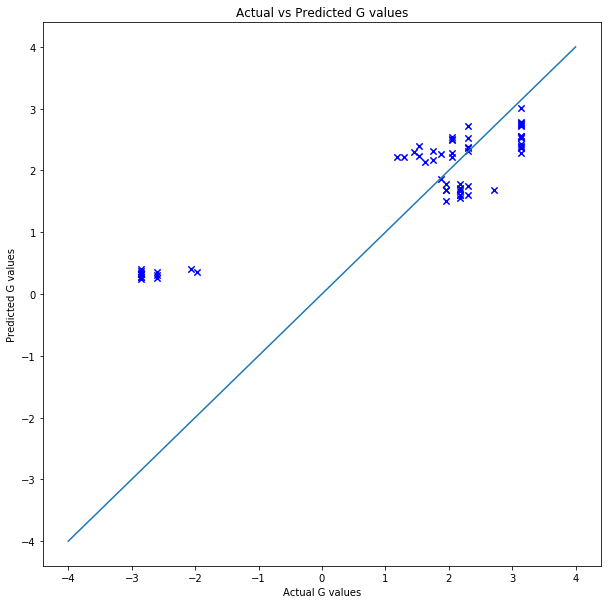

In [108]:
x = np.linspace(-4,4,10)

plt.scatter(oos_results['Actual'], oos_results['Predicted'], color = 'b', marker = 'x', s = 40)
#plt.xlim(0, 4)
#plt.ylim(-1, 3)
plt.plot(x, x)
plt.title('Actual vs Predicted G values')
plt.xlabel('Actual G values')
plt.ylabel('Predicted G values')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

###############################################################################################################################

Standardization

###############################################################################################################################

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [165]:
lasso = Lasso(alpha = 0.01)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = test_size, random_state = random_state)

lasso.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = lasso.predict(X_test)

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = lasso.predict(X_train)
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.3380518772978586
r^2: 0.8912170745616956
Total r^2 score: 0.906881806758164


In [83]:
features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lasso.coef_), pd.DataFrame(np.abs(lasso.coef_))], axis = 1)
features.columns = ['Feature', 'Coefficient', 'Abs Val Coefficient']
features.set_index('Feature', inplace = True)

features.sort_values(by = ['Abs Val Coefficient'], ascending = False, inplace = True)

for feature in features.index:
    if feature in solvent_columns:
        features.loc[feature, 'type'] = 'solvent'
    elif feature in nucleophile_columns:
        features.loc[feature, 'type'] = 'nucleophile'
    elif feature in catalyst_columns:
        features.loc[feature, 'type'] = 'catalyst'
    elif feature in iminium_columns:
        features.loc[feature, 'type'] = 'iminium'

features = features[['type', 'Coefficient', 'Abs Val Coefficient']]
        
features.head(25)
#for i in range(299):
 #   if np.abs(features.iloc[i,0]) > 0.001:
  #      print(i, features.index[i])



,type,Coefficient,Abs Val Coefficient
Feature,,,
N,iminium,-0.717307,0.717307
C,iminium,-0.669799,0.669799
LUMO (iminium),iminium,-0.527237,0.527237
B5,nucleophile,-0.510344,0.510344
Variation,solvent,-0.500894,0.500894
Topological charge index of order 2,solvent,0.491624,0.491624
SL,iminium,0.435412,0.435412
i NH,iminium,-0.296851,0.296851
LUMO (nucleophile),nucleophile,0.283483,0.283483


In [159]:
lasso = Lasso(alpha = 0.001)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = test_size, random_state = random_state)

lasso.fit(X_train, Y_train.ravel())
Y_pred = lasso.predict(X_test)

results = pd.concat([pd.DataFrame(Y_test), pd.DataFrame(Y_pred)], axis = 1)
#results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = lasso.predict(X_train)
train_results = pd.concat([pd.DataFrame(Y_train), pd.DataFrame(Y_train_pred)], axis = 1)
#train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.09147943180801062
r^2: 0.9124229247521239
Total r^2 score: 0.920341271516661


C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1033098897698963, tolerance: 0.018127440463454082
  positive)


In [62]:
tree = DecisionTreeRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = test_size, random_state = random_state)

tree.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = tree.predict(X_test)

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = tree.predict(X_train)
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.3502341980531803
r^2: 0.8743250029607399
Total r^2 score: 0.9400281584354003


In [63]:
tree = DecisionTreeRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = test_size, random_state = random_state)

tree.fit(X_train, Y_train.ravel())
Y_pred = tree.predict(X_test)

results = pd.concat([pd.DataFrame(Y_test), pd.DataFrame(Y_pred)], axis = 1)
#results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = tree.predict(X_train)
train_results = pd.concat([pd.DataFrame(Y_train), pd.DataFrame(Y_train_pred)], axis = 1)
#train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.12263203999114426
r^2: 0.8783758238495499
Total r^2 score: 0.9365319913906209


In [75]:
boosting_tree = GradientBoostingRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = test_size, random_state = random_state)

boosting_tree.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = boosting_tree.predict(X_test)

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = boosting_tree.predict(X_train)
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.2398432156559256
r^2: 0.9218127607096547
Total r^2 score: 0.9548236513233098


In [74]:
boosting_tree = GradientBoostingRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = test_size, random_state = random_state)

boosting_tree.fit(X_train, Y_train.ravel())
Y_pred = boosting_tree.predict(X_test)

results = pd.concat([pd.DataFrame(Y_test), pd.DataFrame(Y_pred)], axis = 1)
#results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = boosting_tree.predict(X_train)
train_results = pd.concat([pd.DataFrame(Y_train), pd.DataFrame(Y_train_pred)], axis = 1)
#train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.06325841910202666
r^2: 0.9353914677513215
Total r^2 score: 0.9601099308684511


In [37]:
forest = RandomForestRegressor(n_estimators = 150)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = test_size, random_state = random_state)

forest.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest.predict(X_test)

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest.predict(X_train)
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.24644835992857392
r^2: 0.9233060067084339
Total r^2 score: 0.9529869854097963


In [94]:
forest = RandomForestRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = test_size, random_state = random_state)

forest.fit(X_train, Y_train.ravel())
Y_pred = forest.predict(X_test)

results = pd.concat([pd.DataFrame(Y_test), pd.DataFrame(Y_pred)], axis = 1)
#results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest.predict(X_train)
train_results = pd.concat([pd.DataFrame(Y_train), pd.DataFrame(Y_train_pred)], axis = 1)
#train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

NameError: name 'X_scaled' is not defined

###############################################################################################################################

Run model 100 times

###############################################################################################################################

In [35]:
X = X_iminium

In [56]:
X

,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,L2 R,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 2,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 3,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 4,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 5,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strecker Reaction (with ketimines) Imine scope 6,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,3.59,1.7,2.12,11.09,1.96,3.29,-0.38303,-0.18662,288.98,1.14
Strecker Reaction (with ketimines) Imine scope 7,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,3.59,1.7,2.12,11.09,1.97,3.29,-0.39109,-0.19325,293.53,1.22
Strecker Reaction (with ketimines) Imine scope 8,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,3.59,1.7,2.12,8.36,1.73,3.3,-0.38516,-0.19602,223.73,2.41


In [47]:
def run_lasso(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'test r^2', 'train r^2', 'total r^2'])
    for i in range(iterations):
        #develop model
        lasso_model = Lasso(alpha = 0.01)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

        lasso_model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
        
        #evaluating performance & scores
        Y_pred = lasso_model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = lasso_model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        all_results = pd.concat([train_results, results])

        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'test r^2': r2_score(Y_test, Y_pred),
                    'train r^2': r2_score(train_results['Actual'], train_results['Predicted']),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted'])}, ignore_index = True)
        
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lasso_model.coef_), pd.DataFrame(np.abs(lasso_model.coef_))], axis = 1)
        features.columns = ['Feature', 'Coefficient', 'Abs Val Coefficient']
        features.set_index('Feature', inplace = True)

        features.sort_values(by = ['Abs Val Coefficient'], ascending = False, inplace = True)

        if i == 0:
            total_features = features.sort_values(by = ['Abs Val Coefficient'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Abs Val Coefficient'] += features.loc[feature, 'Abs Val Coefficient']
        
    
    #add average for scores
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'test r^2': averages.iloc[0,2],
                        'train r^2': averages.iloc[0,3],
                           'total r^2': averages.iloc[0,4]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Coefficient', 'Abs Val Coefficient']]
    total_features = total_features.sort_values(by = ['Abs Val Coefficient'], ascending = False)
    
    return scores, total_features

In [36]:
def run_decision_tree(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'test r^2', 'train r^2', 'total r^2'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model
        tree_model = DecisionTreeRegressor()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

        tree_model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
        
        #evaluating performance
        Y_pred = tree_model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = tree_model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        all_results = pd.concat([train_results, results])

        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'test r^2': r2_score(Y_test, Y_pred),
                    'train r^2': r2_score(train_results['Actual'], train_results['Predicted']),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted'])}, ignore_index = True)
        
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(tree_model.feature_importances_)], axis = 1)
        features.columns = ['Feature', 'Importance']
        features.set_index('Feature', inplace = True)

        if i == 0:
            total_features = features.sort_values(by = ['Importance'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Importance'] += features.loc[feature, 'Importance']
    
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'test r^2': averages.iloc[0,2],
                        'train r^2': averages.iloc[0,3],
                           'total r^2': averages.iloc[0,4]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Importance']]
    total_features = total_features.sort_values(by = ['Importance'], ascending = False)
    
    return scores, total_features

In [40]:
def run_boosting_tree(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'test r^2', 'train r^2', 'total r^2'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model
        boosting_tree = GradientBoostingRegressor()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

        boosting_tree.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
        
        #evaluating performance
        Y_pred = boosting_tree.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = boosting_tree.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']
        
        all_results = pd.concat([train_results, results])
       
        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'test r^2': r2_score(Y_test, Y_pred),
                    'train r^2': r2_score(train_results['Actual'], train_results['Predicted']),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted'])}, ignore_index = True)
        
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(boosting_tree.feature_importances_)], axis = 1)
        features.columns = ['Feature', 'Importance']
        features.set_index('Feature', inplace = True)
        
        if i == 0:
            total_features = features.sort_values(by = ['Importance'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Importance'] += features.loc[feature, 'Importance']
        
        
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'test r^2': averages.iloc[0,2],
                        'train r^2': averages.iloc[0,3],
                           'total r^2': averages.iloc[0,4]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Importance']]
    total_features = total_features.sort_values(by = ['Importance'], ascending = False)
    
    return scores, total_features

In [41]:
def run_random_forest(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'test r^2', 'train r^2', 'total r^2'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model & scores
        forest = RandomForestRegressor(n_estimators = 150)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

        forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
        
        #evaluating performance
        Y_pred = forest.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = forest.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']
        
        all_results = pd.concat([train_results, results])
        
        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'test r^2': r2_score(Y_test, Y_pred),
                    'train r^2': r2_score(train_results['Actual'], train_results['Predicted']),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted'])}, ignore_index = True)
        
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(forest.feature_importances_)], axis = 1)
        features.columns = ['Feature', 'Importance']
        features.set_index('Feature', inplace = True)
        
        if i == 0:
            total_features = features.sort_values(by = ['Importance'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Importance'] += features.loc[feature, 'Importance']
    
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'test r^2': averages.iloc[0,2],
                        'train r^2': averages.iloc[0,3],
                           'total r^2': averages.iloc[0,4]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Importance']]
    total_features = total_features.sort_values(by = ['Importance'], ascending = False)
    
    return scores, total_features

In [57]:
results, features = run_lasso(100)
print(results)
print(results.std())

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.627803860983605, tolerance: 0.057828936650606635
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.36260610258188, tolerance: 0.05622135200520618
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.271398478978387, tolerance: 0.05320838746326077
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.89550420056333, tolerance: 0.05773767867762324
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.380709674885896, tolerance: 0.059095846117100045
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.314128660113944, tolerance: 0.058088564935126964
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.960741304870723, tolerance: 0.05506939225450545
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.80885047345585, tolerance: 0.06178725075023405
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.819614756891, tolerance: 0.053836133577085894
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.16852493477338, tolerance: 0.05685959417969116
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.27497854964801, tolerance: 0.05427044869695201
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.84641286086108, tolerance: 0.05272799521499422
  positive)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

    iteration       MSE  test r^2  train r^2  total r^2
0           1  0.760191  0.747991   0.889991   0.819215
1           2  0.667853  0.784698   0.875472   0.828948
2           3  0.555538  0.827781   0.843074   0.835845
3           4  0.709487  0.781466   0.860980   0.818589
4           5  0.616343  0.797584   0.858387   0.827915
..        ...       ...       ...        ...        ...
96         97  0.627346  0.791117   0.855011   0.823916
97         98  0.648415  0.787195   0.890921   0.838675
98         99  0.561788  0.796438   0.884776   0.844572
99        100  0.544029  0.816111   0.899208   0.858640
100   average  0.625567  0.794349   0.874478   0.834845

[101 rows x 5 columns]
MSE          0.119740
test r^2     0.040381
train r^2    0.013628
total r^2    0.018519
dtype: float64


In [58]:
print(results.std())

MSE          0.119740
test r^2     0.040381
train r^2    0.013628
total r^2    0.018519
dtype: float64


In [37]:
results, features = run_decision_tree(100)
print(results)
print(results.std())

    iteration       MSE  test r^2  train r^2  total r^2
0           1  0.384778  0.867612   0.997189   0.934913
1           2  0.285359  0.903804   0.997679   0.951643
2           3  0.509057  0.840611   0.995665   0.913777
3           4  0.462666  0.849705   0.997188   0.922112
4           5  0.470212  0.841641   0.996240   0.920336
..        ...       ...       ...        ...        ...
96         97  0.317126  0.888377   0.999886   0.947499
97         98  0.269725  0.909653   0.997448   0.954106
98         99  0.270447  0.909473   0.997743   0.954138
99        100  0.231645  0.918123   0.999498   0.961428
100   average  0.354924  0.881647   0.997104   0.939863

[101 rows x 5 columns]
MSE          0.080232
test r^2     0.028499
train r^2    0.001339
total r^2    0.013343
dtype: float64


In [42]:
results, features = run_boosting_tree(100)
print(results)
print(results.std())

    iteration       MSE  test r^2  train r^2  total r^2
0           1  0.225020  0.924946   0.988657   0.957131
1           2  0.171371  0.941046   0.984632   0.963681
2           3  0.169828  0.946479   0.987404   0.965933
3           4  0.240005  0.920203   0.988164   0.954404
4           5  0.195024  0.936844   0.984749   0.960385
..        ...       ...       ...        ...        ...
96         97  0.189563  0.932999   0.988198   0.962373
97         98  0.230132  0.922081   0.986763   0.955195
98         99  0.194340  0.931163   0.989626   0.962430
99        100  0.236113  0.926573   0.988744   0.955687
100   average  0.229232  0.923875   0.987358   0.955826

[101 rows x 5 columns]
MSE          0.040100
test r^2     0.014515
train r^2    0.002059
total r^2    0.006398
dtype: float64


In [43]:
results, features = run_random_forest(100)
print(results)
print(results.std())

    iteration       MSE  test r^2  train r^2  total r^2
0           1  0.204077  0.926246   0.987535   0.959512
1           2  0.225966  0.923742   0.987913   0.956506
2           3  0.188555  0.936594   0.987168   0.962302
3           4  0.237177  0.920653   0.986959   0.954185
4           5  0.211055  0.933578   0.985714   0.958416
..        ...       ...       ...        ...        ...
96         97  0.196378  0.935074   0.984023   0.959601
97         98  0.200724  0.934440   0.983021   0.958429
98         99  0.283655  0.895162   0.989736   0.947424
99        100  0.159766  0.945527   0.987318   0.967053
100   average  0.219008  0.927365   0.987495   0.957590

[101 rows x 5 columns]
MSE          0.035823
test r^2     0.012863
train r^2    0.001912
total r^2    0.005570
dtype: float64


###############################################################################################################################

Run standardized model 100 times

###############################################################################################################################

In [38]:
def run_random_forest_standard(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MSE', 'r^2', 'total r^2'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model & scores
        forest = RandomForestRegressor(n_estimators = 150)
        X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = test_size, random_state = random_state)

        forest.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
        
        #evaluating performance
        Y_pred = forest.predict(X_test)

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = forest.predict(X_train)
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        all_results = pd.concat([train_results, results])
        
        scores = scores.append({'iteration': str(i+1),
                    'MSE': mean_squared_error(Y_test, Y_pred),
                    'r^2': r2_score(Y_test, Y_pred),
                    'total r^2': r2_score(all_results['Actual'], all_results['Predicted'])}, ignore_index = True)
        
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(forest.feature_importances_)], axis = 1)
        features.columns = ['Feature', 'Importance']
        features.set_index('Feature', inplace = True)
        
        if i == 0:
            total_features = features.sort_values(by = ['Importance'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Importance'] += features.loc[feature, 'Importance']
    
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MSE': averages.iloc[0,1],
                           'r^2': averages.iloc[0,2],
                           'total r^2': averages.iloc[0,3]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Importance']]
    total_features = total_features.sort_values(by = ['Importance'], ascending = False)
    
    return scores, total_features

In [39]:
score, feature = run_random_forest_standard(100)

In [41]:
score

,iteration,MSE,r^2,total r^2
0,1,0.221964,0.931938,0.957045
1,2,0.244228,0.919765,0.953476
2,3,0.232496,0.922735,0.954733
3,4,0.229730,0.916894,0.954795
4,5,0.235134,0.926333,0.955705
...,...,...,...,...
96,97,0.255690,0.913649,0.951349
97,98,0.226780,0.925003,0.955820
98,99,0.286267,0.899126,0.947764
99,100,0.217734,0.929522,0.958083


In [115]:
score

,iteration,MSE,r^2,total r^2
0,1,0.167519,0.944607,0.958691
1,2,0.183179,0.939318,0.953373
2,3,0.191884,0.939543,0.953725
3,4,0.169245,0.943731,0.957468
4,5,0.202532,0.934599,0.951862
...,...,...,...,...
96,97,0.211742,0.928714,0.951144
97,98,0.127635,0.957790,0.960941
98,99,0.154608,0.949176,0.958908
99,100,0.206295,0.933735,0.954084


In [48]:
#iminium + nucleophile
X_total_is_scaled = pd.read_excel('X (all features, IS, scaled).xlsx').set_index('Reaction')
X_total_oos_scaled = pd.read_excel('X (all features, OOS, scaled).xlsx').set_index('Reaction')

In [57]:
def run_random_forest_standard_oos(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'MAE18', 'MAE19', 'MAE20', 'r^2'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model & scores
        forest = RandomForestRegressor()

        forest.fit(X_total_is_scaled, Y.reset_index().drop('Reaction', axis = 1).values.ravel())
        
        #evaluating performance
        Y_pred = forest.predict(X_test)

        OOS_pred = forest.predict(X_total_oos_scaled)

        oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
        oos_results.set_index('Reaction', inplace = True)
        oos_results.columns = ['Actual', 'Predicted']
        
        scores = scores.append({'iteration': str(i+1),
                    'MAE18': mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15]),
                    'MAE19': mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30]),
                    'MAE20': mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:]),
                    'r^2': r2_score(Y_oos, OOS_pred)
                               }, ignore_index = True)
        
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'MAE18': averages.iloc[0,1],
                           'MAE19': averages.iloc[0,2],
                           'MAE20': averages.iloc[0,3],
                           'r^2': averages.iloc[0,4]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in

    return scores

In [58]:
run_random_forest_standard_oos(100)

,iteration,MAE18,MAE19,MAE20,r^2
0,1,0.398985,2.957592,0.509529,0.527072
1,2,0.463003,2.967924,0.512458,0.521791
2,3,0.477259,3.061844,0.517976,0.490808
3,4,0.396929,3.103538,0.521902,0.481070
4,5,0.450446,2.848651,0.504130,0.556482
...,...,...,...,...,...
96,97,0.499925,2.990670,0.516615,0.510122
97,98,0.446607,3.092859,0.509790,0.484030
98,99,0.406593,2.970564,0.512269,0.523512
99,100,0.464195,3.045250,0.518472,0.497056


###############################################################################################################################

Feature Development Trash

###############################################################################################################################

In [72]:
def find_features_forest(iteration):
    for i in range(iteration):
        forest = RandomForestRegressor()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

        forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(forest.feature_importances_)], axis = 1)
        features.columns = ['Feature', 'Importance']
        features.set_index('Feature', inplace = True)
        
        if i == 0:
            total_features = features.sort_values(by = ['Importance'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Importance'] += features.loc[feature, 'Importance']
        
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Importance']]
    total_features = total_features.sort_values(by = ['Importance'], ascending = False)
    
    return total_features

In [73]:
find_features_forest(10).head(30)

,type,Importance
Feature,,
C,iminium,5.669186
SL,iminium,1.390403
H-X-Nu,nucleophile,0.273772
PG,iminium,0.268786
H-X-CNu,nucleophile,0.172070
B5,nucleophile,0.162421
X,nucleophile,0.155937
electronic energy difference (kcal/mol),iminium,0.142285
N,iminium,0.119111


In [130]:
7/3
#look through code and try to fix bugs, make sure information are used correctly
#run models 10 times with computer initialized random seed
#try to predict reactions by withholding others 
#prepare powerpoint for chemistry collaborator mainly focused on results, importance of features (one with iminium, one without iminium),
#dont use complex terms

7/9
#try data standardization on models (first on lasso)
#include model in pres where we predict E/Z
#clean up presentation
#try to replicate models\

7/12
#write method part of paper
#look thru code

7/14
#purpose to justify model we use over theirs
#so many features doesn''t matter
#clearly lay out advantage of this model 
#(can visualize a decision tree in random forest)
#instead of linearly combining features, say that if features fall in range, we look at another feeature
#only predict with catalyst and solvent

#train a model 
#input imine, nuc, solvent properties
#drop solvent, then drop nucleophile
#output which catalyst we should use

7/15
#use imine, nuc, solvent to predict important catalyst properties
#separate models for each property
#find std of average r^2 values of scores
#for results, make table to compare 3/4 models and their scores, mention lasso, decision tree, etc.
#go E/Z imine models or LORO, try using internal cross validation to select features (divide all data into subgroups, each time leave one group
#out and see which features are selected, average over all group, select top 10/20 features to develop model)
#for LORO do it for all 17 and plot results

7/18
#try to fix overfitting, look at decisiion tress (deep = bad)
#modify X data to include cat, nuc, imine, etc before each feature, send data
#go E/Z imine models or LORO, try using internal cross validation to select features (divide all data into subgroups, each time leave one group
#out and see which features are selected, average over all group, select top 10/20 features to develop model)
#plot features used in reaction against DDG

7/20
#identify samples that mislead the model (use the same catalyst)
#give smaples with separate catalysts higher weight, see what happen
#sample of 20 reactions, one from each catalyst, should pick up on important catalyst features
#try doing manual cross validation, hyper

#if property is out of range (in low density), then use differnt model that doesn't use this property
#gaussian mixture model to estimate distribution of feature

#3 models: model 1 - w/ all features, model 2 - w/ all features - 1, model 3 - w/all features - 2/3
#later: 3 models: model 1 - w/ all features, model 2 - w/ nuc cat sol, model 3 - w/ cat sol
#use gaussian to determine if deterministic feature of new reaction is in low denstiy area - if it is, move on to model 2, if not, use model 1
#sit down take piece of paper write down logic

0.35

In [109]:
#if sample is in high desntiy, use random forest
#if in low density use linear regression

#identify 2 most recurrent features of each category (im nuc sol cat), try to build good linear regression model (lasso)
#try everything including hyperparameter tuning and all feartures
#standardize oos and try standardized lasso

#only use important features (5, 10) to build gmm (try diferent number of random components (2 up to 10), look at aic bic)
#aic and bic should hit minimum - graph n_components vs aic and bic score to figure out minimum

#hyperparameter tuning random forest
#try using only iminium features in gmm
#identify which feature makes it different

In [ ]:
#4 models
#all properties, no imine, no nucleophile, lasso
#20 - all prop
#19 - no imine
#18 - no nuc
#if no different, apply 
#for intro - copy nature paper, rephrase a lot
#(p1 why we want to do this research)
#(p2 briefly explain how we do it)

In [ ]:
#predict important cat features using nuc imi
#predict important nuc using imi (try including cat sol if necessary)
#predict important imi using nuc (try including cat sol if necessary)
#if i fix cat if i fix nuc can i predict imi etc.